In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("/content/ObesityDataSet_raw_and_data_sinthetic.csv")

In [3]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [5]:
data.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [16]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,kmeans_clnum,KMeans_1,KMeans_2,KMeans_3,KMeans_4,KMeans_5
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.0,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866,0.975367,0.0,0.390810,1.019896,1.668404,1.603032
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927,0.803051,0.0,0.488048,0.830453,0.992838,1.437042
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350,1.000000,0.0,0.000000,1.000000,2.000000,1.000000
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000,2.000000,0.0,1.000000,2.000000,3.000000,3.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,2.000000,0.0,1.000000,2.000000,3.000000,4.000000


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

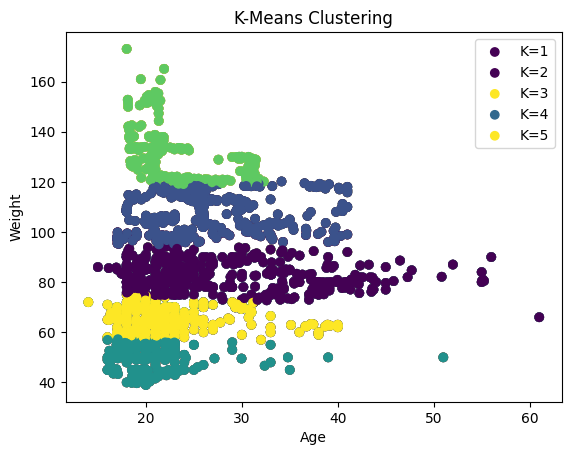

In [17]:
for k in range(1,6):
  kmeans=KMeans(n_clusters=k)
  kmeans.fit(data[['Age','Weight']])
  data[f'KMeans_{k}'] = kmeans.labels_
  plt.scatter(x=data['Age'], y=data['Weight'], c=data[f'KMeans_{k}'], label=f'K={k}')

plt.xlabel('Age')
plt.ylabel('Weight')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

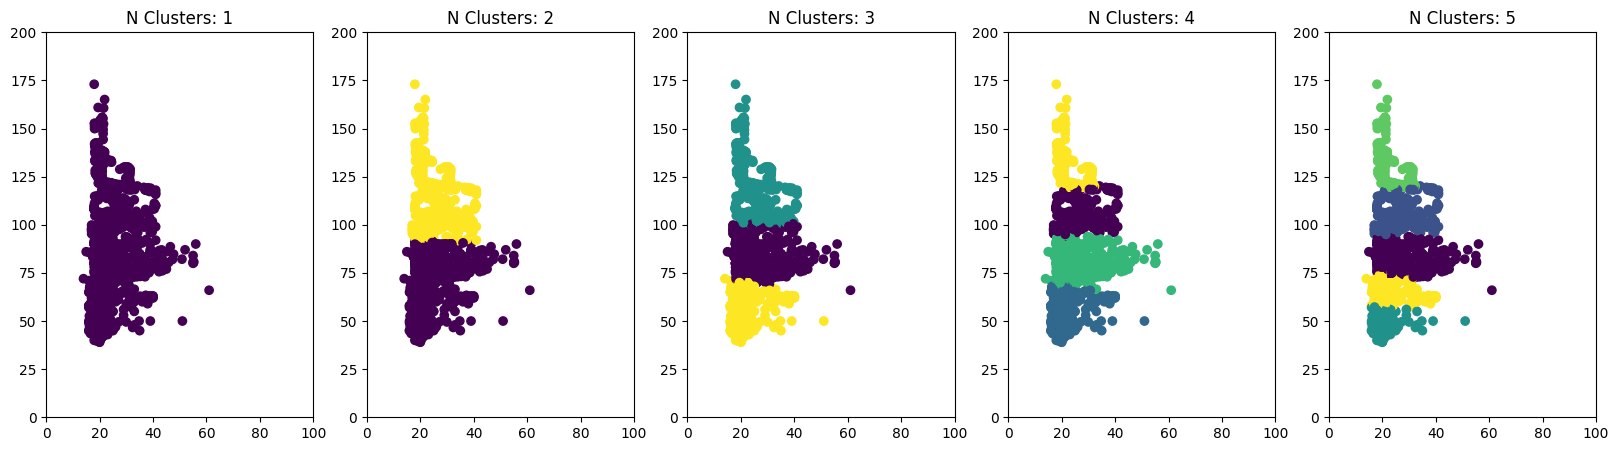

In [19]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

for i, ax in enumerate(fig.axes, start=1):
    ax.scatter(x=data['Age'], y=data['Weight'], c=data[f'KMeans_{i}'])
    ax.set_ylim(0, 200)
    ax.set_xlim(0, 100)
    ax.set_title(f'N Clusters: {i}')

plt.show()

#**Elbow Method**

The elbow method is a widely used approach for determining the ideal number of clusters in k-means clustering. It involves plotting the sum of squared errors (SSE) against various values of k The optimal number of clusters is typically identified at the point where the SSE curve begins to exhibit a flattening or at the appearance of the elbow in the graph.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

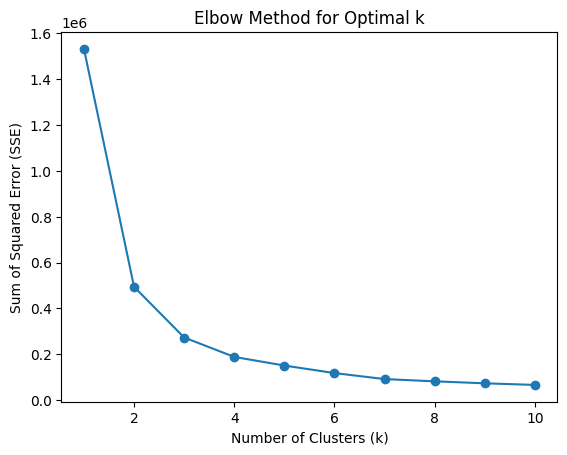

In [21]:
sse = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=2)
    kmeans.fit(data[['Age', 'Weight']])
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.show()

The SSE starts to flatten out at k=7 for the above graph